# Laboratorio 2
## Detección de SPAM
Preprocesamiento del lenguaje para detección de SPAM en correos electrónicos utilizando ML
> #### Gerardo Méndez 18239, Luis Pedro Cuéllar 18220 

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
## cargamos los sets de datos
csa_df = pd.read_csv('datasets/completeSpamAssassin.csv')
ess_df = pd.read_csv('datasets/enronSpamSubset.csv')

### Parte 1 - Ingeniería de Características

#### Exploración de datos

In [ ]:
## mostramos los datos de csa
csa_df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [ ]:
## mostramos los datos de ess
ess_df.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [ ]:
## la columna 1 y 2 del segundo dataset es identica, podemos eliminar una
ess_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
csa_df.drop('Unnamed: 0', inplace=True, axis=1)

In [ ]:
## unimos los datasets con el mismo numero de columnas
df = csa_df.append(ess_df, ignore_index=True)

In [ ]:
df

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
16041,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
16042,Subject: missing bloomberg deals\n stephanie -...,0
16043,Subject: eops salary survey questionnaire\n we...,0
16044,"Subject: q 3 comparison\n hi louise ,\n i have...",0


In [ ]:
## rename de columnas para mejor entendimiento
df.rename(columns={"Body": "body", "Label": "label"}, inplace = True)
df.dropna(inplace = True)

#### Preprocesamiento

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import unicodedata

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gerardo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gerardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gerardo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gerardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

corpus = []

"""
Para el preprocesamiento del 'body' se hicieron los siguientes arreglos:
    * eliminamos los caracteres especiales
    * convertimos las letras a minusculas
    * eliminamos las stop words
"""
def preprocessing(body):
    ## quitamos caracteres especiales y mayusculas
    no_spec = re.sub('[\n|\t]', ' ', body)
    no_spec = re.sub(r'[^a-zA-Z]', ' ', body)
    
    lower = no_spec.lower().strip()
    
    ## generamos los tokens sin stop words
    tokens = nltk.word_tokenize(lower)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    ## lematizar palabras
    lemma = [wnl.lemmatize(token) for token in filtered_tokens]
    
    ## string final
    final_string = ' '.join(lemma)
    
    return final_string

In [ ]:
df.apply(lambda row: corpus.append(preprocessing(row['body'])), axis=1)
corpus

['save life insurance spend life quote saving ensuring family financial security important life quote saving make buying life insurance simple affordable provide free access best company lowest rate life quote saving fast easy save money let u help get started best value country new coverage save hundred even thousand dollar requesting free quote lifequote saving service take le minute complete shop compare save type life insurance click free quote protecting family best investment ever make receipt email error wish removed list please click type remove reside state prohibits e mail solicitation insurance please disregard email',
 'fight risk cancer http www adclick w p cfm pk slim guaranteed lose lb day http www adclick w p cfm pk get child support deserve free legal advice http www adclick w p cfm pk join web fastest growing single community http www adclick w p cfm pk start private photo album online http www adclick w p cfm pk wonderful day offer manager prizemamaif wish leave list

#### Representación de texto

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Bag of N-gram

In [ ]:
bag = CountVectorizer(ngram_range=(1,2), max_features=5000)
bag_matrix = bag.fit_transform(corpus).toarray()
vocab = bag.get_feature_names_out()

bog_features = pd.DataFrame(bag_matrix, columns=vocab)
bog_target = df['label']

bog_features.head(10)

,aa,ab,ability,able,absence,absolute,absolutely,abuse,ac,academic,...,york time,young,yr,zdnet,zero,zimbabwe,zimin,zimin lu,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

tf_features = pd.DataFrame(vectors, columns=feature_names)
tf_target = df['label']

tf_features.head(10)

,aa,ab,abacha,abandoned,ability,able,abroad,absence,absolute,absolutely,...,zd,zdnet,zealand,zero,zimbabwe,zimin,zip,zone,zoom,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.082293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088976,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Parte 2 - Implementación del modelo

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [ ]:
test_ratio = 0.3

In [ ]:
bayes = MultinomialNB()

**Modelo para Bag of N-gram**

In [ ]:
bog_x_train, bog_x_test, bog_y_train, bog_y_test = train_test_split(bog_features, np.asarray(bog_target), test_size = test_ratio)

In [ ]:
bayes.fit(bog_x_train, bog_y_train)

MultinomialNB()

In [ ]:
bog_y_pred = bayes.predict(bog_x_test)

bog_cf_matrix = confusion_matrix(bog_y_test, bog_y_pred)
bog_cf_matrix

array([[2642,  125],
       [ 118, 1929]], dtype=int64)

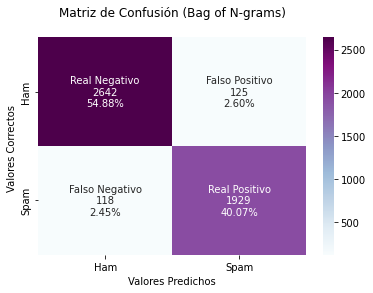

In [ ]:
## plot de matriz de confusion
group_names = ['Real Negativo','Falso Positivo','Falso Negativo','Real Positivo']
group_counts = ["{0:0.0f}".format(value) for value in bog_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in bog_cf_matrix.flatten()/np.sum(bog_cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(bog_cf_matrix, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Matriz de Confusión (Bag of N-grams)\n');

ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])
ax.set_xlabel('Valores Predichos');
ax.set_ylabel('Valores Correctos ');

In [ ]:
bog_classification_report = classification_report(bog_y_test, bog_y_pred)
print(bog_classification_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2767
           1       0.94      0.94      0.94      2047

    accuracy                           0.95      4814
   macro avg       0.95      0.95      0.95      4814
weighted avg       0.95      0.95      0.95      4814



**Modelo para TF-IDF**

In [ ]:
tf_x_train, tf_x_test, tf_y_train, tf_y_test = train_test_split(tf_features, tf_target, test_size = test_ratio)

In [ ]:
bayes.fit(tf_x_train, tf_y_train)

MultinomialNB()

In [ ]:
tf_y_pred = bayes.predict(tf_x_test)

tf_cf_matrix = confusion_matrix(tf_y_test, tf_y_pred)
tf_cf_matrix

array([[2577,  119],
       [  88, 2030]], dtype=int64)

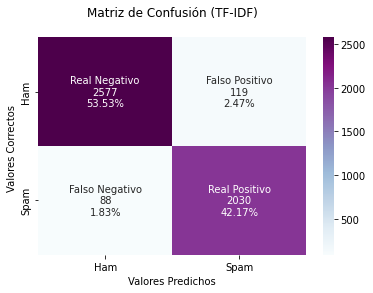

In [ ]:
## plot de matriz de confusion
group_names = ['Real Negativo','Falso Positivo','Falso Negativo','Real Positivo']
group_counts = ["{0:0.0f}".format(value) for value in tf_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in tf_cf_matrix.flatten()/np.sum(tf_cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(tf_cf_matrix, annot=labels, fmt='', cmap='BuPu')

ax.set_title('Matriz de Confusión (TF-IDF)\n');

ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])
ax.set_xlabel('Valores Predichos');
ax.set_ylabel('Valores Correctos ');

In [ ]:
classification_report = classification_report(tf_y_test, tf_y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2696
           1       0.94      0.96      0.95      2118

    accuracy                           0.96      4814
   macro avg       0.96      0.96      0.96      4814
weighted avg       0.96      0.96      0.96      4814



### Conclusiones

Compare los valores para cada representación numérica. ¿Qué representación numérica produjo el mejor resultado? Explique los valores obtenidos en las 
métricas para el mejor modelo. 

#### Matriz de confusion

Las matrices de confusion para ambos modelos son bastante buenas, con solamente un 5% de valores clasificados "incorrectamente" en el modelo BoG y un 4.3% en el modelo TF-IDF. Ambos resultados son satisfactorios, y representan modelos con un rendimiento bastante bueno para clasificar correos. Sin embargo, el modelo 2 presenta un número menor en los casos de falsos negativos, los cuales hacen alusión a casos en los que el modelo clasifica correos de SPAM como no SPAM. Debido a que estos son los casos que se buscan minimizar, consideramos que el segundo modelo presenta mejores valores al momento de la comparación.

#### Recall

***El recall nos permite conocer (para cada categoría): del total de entradas pertenecientes a esa categoría, cuántas de ellas fueron clasificadas por el modelo como tal.*** 

Podemos observar que para el primero modelo (BoG) el recall para las clases 0 y 1 es de .95 y .94 respectivamente. Esto es un muy buen valor para un modelo clasificación, y podemos ver que se balancea para ambas clases. Como el "label" que más nos interesa es el de SPAM, podemos decir que el modelo clasificó como SPAM el 94% de los mensajes "true" de SPAM.

Igualmente, podemos observar que el recall para el modelo utilizando TF-IDF tiene un valor de .96 para ambas categorías, ambas ligeramente mayores a las del anterior modelo. Sabemos entonces que del total de casos de SPAM en nuestro dataset de pruebas, el 96% fue identificado correctamente como tal.

#### Precision
***La métrica de precision nos permite ver cuántos valores de los que se identificaron dentro de una categoría, pertenecen realmente a esa categoría***

En el caso del primer modelo, la precision es del .96 y .94 para las clases 0 y 1 respectivamente. Centrándonos en la categoría de SPAM, podemos ver que de los casos que el modelo detectó como SPAM, el 94% realmente lo era.

Por otra parte, el segundo modelo tiene valores similares: .97 y .94 para las clases 0 y 1, variando únicamente por 1 decimal la clase de los mensajes que no son SPAM.

#### F1 Score
Este valor es un tradeoff entre la precision y el recall.

Para el modelo BoG, el F1 Score fue de .96 y .94 para las clases 0 y 1. Esto represante nuevamente buenos valores, e indica que tanto la precision como el recall son bastante altos, y ninguno "perjudica" al otro.

En el modelo de TF-IDF, el F1 Score es ligeramente mayor en la clase 1 con un .95, y tiene el mismo valor de .96 para la clase 0. Representa un mejor rendimiento aunque la diferencia sea mínima.

#### Finales

* Se logró construir dos modelos eficientes, utilizando dos técnicas de representación de texto diferentes, que sean capaces de clasificar correos electrónicos de SPAM de una forma altamente confiable. 
* El modelo construido utilizando la técnica de TF-IDF presentó resultados ligeramente mejores, especialmente en el conteo de Falsos Negativos (casos de SPAM clasificados como legítimos). Aún así, ambas técnicas son recomendables y efectivas para la representación de texto.